<center>
## Exploratory Data Analysis  and Prediction of Reason for rejection of quotations and sales orders at the Enterprise
<center>Author: Mikhail Burinov (@burmish)


# Getting to know the data
A sales order is an electronic document that captures and records your customer´s request for goods or services.
The sales order contains all pertinent information to process the customer´s request throughout the whole process cycle.
The Sales component thus automatically suggests data from master records and control tables that you previously put aside. As a result, possible input errors occurring during sales order processing and entering of redundant data is avoided.

Reason for rejection (Or known as "Rejection reason") is a very commonly used functionality to specify whether a certain line item in the sales order is rejected (Blocked for further processing) or not.
Our goal is to analyzenthe data and try several hypothesis on prediction of Reason for rejection.

Firstly, we read into DataFrame our dataset for Reason for rejection of quotations and sales orders at the Enterprise:

In [31]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
import pylab as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)

In [32]:
df = pd.read_csv('rfr.csv',sep=';',thousands=".", decimal=",")
md = pd.read_csv('REASON_REJ.csv',sep=';')

Let's print the shape of the loaded dataframe and examine the features we are given.

In [33]:
df.head(15)

,Sales document,Partner Function,Item,Item.1,Billing document,R,Reason for rejection,Reason for order,Condition,Incoterms,Created on,Actual Invoiced Quan,Bill.quan.stock unit,Base Unit,Sales unit,Document c,Net priceSO,Net valueSO,Condition pric. unit,CumConfirmedQty,Base Unit.1,Invoice created,Invoice created by,Billing doc/ date,Billing status,Payment condition,Order unit,Document c.1,Net valueB,Confirmed qty.,Material,Customer,Division,Sales Organization,Shipping conditions,Distribution Channel,Plant,Sold-to party,Schedule line date,Billing type,Sales doc. type
0,3411848,SH,10,10.0,163002241.0,NaN,NaN,NaN,M3,DAP,01/02/2015,140.0,140.0,M3,M3,EUR,23.90,3346.00,1,140,M3,15/01/2015,SYS-BTC-FI,15/01/2015,NaN,I108,M3,EUR,3346.00,140,134409,22983,99,NL05,70,1,NL01,22983,01/07/2015,ZF4,ZOR1
1,3411848,SP,10,10.0,163002241.0,NaN,NaN,NaN,M3,DAP,01/02/2015,140.0,140.0,M3,M3,EUR,23.90,3346.00,1,140,M3,15/01/2015,SYS-BTC-FI,15/01/2015,NaN,I108,M3,EUR,3346.00,140,134409,22983,99,NL05,70,1,NL01,22983,01/07/2015,ZF4,ZOR1
2,3411850,SH,10,10.0,163002227.0,NaN,NaN,NaN,M3,DAP,01/02/2015,120.0,120.0,M3,M3,EUR,23.90,2868.00,1,120,M3,15/01/2015,SYS-BTC-FI,15/01/2015,NaN,I011,M3,EUR,2868.00,120,134409,22290,99,NL05,70,1,NL01,22290,01/07/2015,ZF4,ZOR1
3,3411850,SP,10,10.0,163002227.0,NaN,NaN,NaN,M3,DAP,01/02/2015,120.0,120.0,M3,M3,EUR,23.90,2868.00,1,120,M3,15/01/2015,SYS-BTC-FI,15/01/2015,NaN,I011,M3,EUR,2868.00,120,134409,22290,99,NL05,70,1,NL01,22290,01/07/2015,ZF4,ZOR1
4,3411851,SH,10,10.0,163002240.0,NaN,NaN,NaN,M3,DAP,01/02/2015,280.0,280.0,M3,M3,EUR,23.90,6692.00,1,280,M3,15/01/2015,SYS-BTC-FI,15/01/2015,NaN,I011,M3,EUR,6692.00,280,134409,22938,99,NL05,70,1,NL01,22938,01/07/2015,ZF4,ZOR1
5,3411851,SP,10,10.0,163002240.0,NaN,NaN,NaN,M3,DAP,01/02/2015,280.0,280.0,M3,M3,EUR,23.90,6692.00,1,280,M3,15/01/2015,SYS-BTC-FI,15/01/2015,NaN,I011,M3,EUR,6692.00,280,134409,22938,99,NL05,70,1,NL01,22938,01/07/2015,ZF4,ZOR1
6,3412466,SH,10,10.0,162001604.0,NaN,NaN,NaN,PAK,FCA,01/05/2015,4824.0,402.0,PAK,ST,EUR,10.80,4341.60,1,402,PAK,13/01/2015,ARKAR,13/01/2015,NaN,N014,ST,PLN,12606.72,4824,52599,28984,99,NL05,2,1,PL13,28984,14/01/2015,ZIV,ZOR
7,3412466,SH,10,10.0,163001643.0,NaN,NaN,NaN,PAK,FCA,01/05/2015,4824.0,402.0,PAK,ST,EUR,10.80,4341.60,1,402,PAK,13/01/2015,ARKAR,13/01/2015,NaN,N014,ST,EUR,4341.60,4824,52599,28984,99,NL05,2,1,PL13,28984,14/01/2015,ZF2,ZOR
8,3412466,SP,10,10.0,162001604.0,NaN,NaN,NaN,PAK,FCA,01/05/2015,4824.0,402.0,PAK,ST,EUR,10.80,4341.60,1,402,PAK,13/01/2015,ARKAR,13/01/2015,NaN,N014,ST,PLN,12606.72,4824,52599,28984,99,NL05,2,1,PL13,28984,14/01/2015,ZIV,ZOR
9,3412466,SP,10,10.0,163001643.0,NaN,NaN,NaN,PAK,FCA,01/05/2015,4824.0,402.0,PAK,ST,EUR,10.80,4341.60,1,402,PAK,13/01/2015,ARKAR,13/01/2015,NaN,N014,ST,EUR,4341.60,4824,52599,28984,99,NL05,2,1,PL13,28984,14/01/2015,ZF2,ZOR


Let's have a look at the features and make sure that we don't have missing rows.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 41 columns):
Sales document          29999 non-null int64
Partner Function        29999 non-null object
Item                    29999 non-null int64
Item.1                  25675 non-null float64
Billing document        25675 non-null float64
R                       0 non-null float64
Reason for rejection    11290 non-null float64
Reason for order        340 non-null float64
Condition               29999 non-null object
Incoterms               29999 non-null object
Created on              29999 non-null object
Actual Invoiced Quan    25675 non-null float64
Bill.quan.stock unit    25675 non-null float64
Base Unit               25675 non-null object
Sales unit              25675 non-null object
Document c              29999 non-null object
Net priceSO             29999 non-null float64
Net valueSO             29999 non-null float64
Condition pric. unit    29999 non-null int64
CumConfirmedQty  

We notice 3 empty features: "R", "Reason for order ", "Billing status". Let's get rid of them. 

Let's also work with date format in the dataset: 

In [35]:
df=df.drop( ['R', 'Reason for order', 'Billing status'], axis=1)
df.drop_duplicates(inplace = True)


In [36]:
df['Created on'] = pd.to_datetime(df['Created on'],format="%d/%m/%Y")
df['Invoice created'] = pd.to_datetime(df['Invoice created'],format="%d/%m/%Y")
df['Billing doc/ date'] = pd.to_datetime(df['Billing doc/ date'],format="%d/%m/%Y")
df['Schedule line date'] = pd.to_datetime(df['Schedule line date'],format="%d/%m/%Y")

Now let's look at the target feature distribution - Reason for rejection of quotations and sales orders

Features description

|  Name  | Description | Type |
|---         |--:       |     |
| **Sales Document** | id of Sales order | categorical |
| **Partner Function** | Partner function allows you to identify which functions a partner has to perform in any business process| categorica |
| **Item ** |Item number inside Sales order | categorical  |
| **Item.1  ** | Item number for billing document |categorical |
| **Billing document  ** | id of Billing document | categorical |
| **Incoterms ** | internationally-recognized terms of delivery reflecting the standards set by the International Chamber of Commerce (ICC) | categorical|
| **Created on** | Date on which the record was created |numeric  |
| **Actual Invoiced Quan ** | Actual Invoiced Quantity of the product | numeric |
| **Bill.quan.stock unit** | Billing quantity in stockkeeping unit | numeric |
| **Base Unit  ** | Base Units of measurements | categorical |
| **Sales unit ** | Sales units of mesurements | categorical |
| **Document c    ** | Currency | categorical |
| **Net priceSO ** | Net price | numeric |
| **Net valueSO ** | Net value of the order item in document currency | numeric |
| **Condition pric. unit** | Condition pricing unit |  categorical |
| **CumConfirmedQty** | Cumulative confirmed quantity in base unit | numeric |
| **Base Unit.1** |Cumulative quantity Unit |  categorical |
| **Invoice created** | Invoice creation date |  numeric|
| **Invoice created by ** | User name who created invoice | categorical |
| **Billing doc. date** | Date of creation of Billing Documnt | numeric |
| **Payment condition  ** | Payment condition |  categorical |
| **Order unit ** | Order unit |  categorical |
| **Document c.1 ** | Document currency for net value |  categorical|
| **Net valueB ** |Net Value of Billing Item in Document Currency | numeric |
| **Confirmed qty** | Confirmed quantity | numeric|
| **Material ** | id of material|  categorical |
| **Customer** | id of customer |  categorical|
| **Division** | Division |  categorical |
| **Sales Organization ** | Sales organization | categorical |
| **Shipping conditions** | Shipping conditions|  categorical|
| **Distribution Channel** | Distribution Channel |  categorical |
| **Plant ** | Plant|  categorical |
| **Sold-to party** | the customer who is going to place the order to the business |  categorical |
| **Schedule line date ** | Schedule line date |  categorical|
| **Billing type** | Billing type|  categorical |
| **Sales doc. type ** | Sales doc. type |  categorical|

Our target feature: **Reason for rejection** – categorical feature. Later we will build the model that will predict the values of this feature. 

Let's explore our target feature

In [37]:
df['Reason for rejection'].value_counts()

52.0    3382
11.0    2274
4.0     2101
14.0    1920
12.0     294
0.0      240
10.0      78
30.0      76
15.0      66
1.0       50
2.0       40
3.0       22
13.0      18
5.0        4
Name: Reason for rejection, dtype: int64

We also have a master data text for Reason for rejection code. Here wecan see that Reason for rejection'55' stands for 'non conform delivery' or '14' means 'Customer decision'

In [38]:
md

,Reason for rejection,L,Medium Description
0,0,E,Assigned by the System (Internal)
1,1,E,Delivery date too late
2,2,E,Poor quality
3,3,E,Too expensive
4,4,E,Competitor better
5,5,E,Guarantee
6,10,E,Unreasonable request
7,11,E,Cust.to receive replacement
8,12,E,Sales decision
9,13,E,Financial decision


Let's visualize the distribution of Reason for rejection of quotations and sales orders

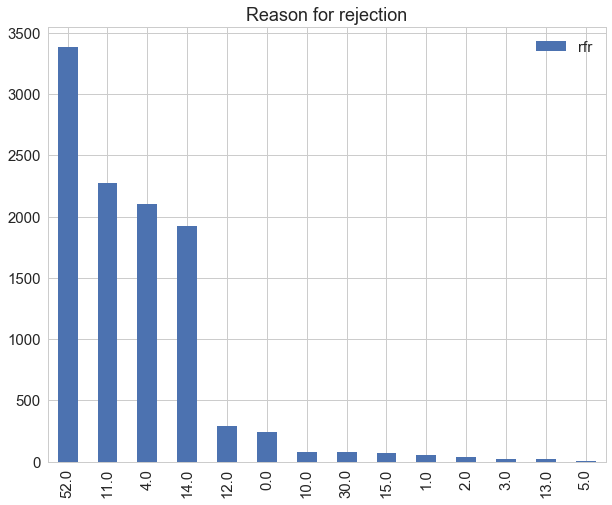

In [39]:
df['Reason for rejection'].value_counts().plot(kind='bar', label='rfr')
plt.legend()
plt.title('Reason for rejection');

For our business purposes it's crucial to predict weather the Sales order was rejected or not. So we will replace value for Reason for rejection from 1 to 52 to 1, and all NaNs will be equal to zero.

In [40]:

df.loc[df['Reason for rejection'] >= 0, 'Reason for rejection'] = 1
df['Reason for rejection'].fillna(0, inplace = True)
df = df.dropna()

In [41]:
df['Reason for rejection'].mean()

0.2535806902054658

Our dataset is non-balanced by classes in target feature (25%/ 75%).

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales document,25065.0,4.454552e+06,6.516347e+06,3411848.0,3.504577e+06,3.645382e+06,3.727129e+06,70080645.0
Item,25065.0,2.320032e+01,2.545848e+01,10.0,1.000000e+01,1.000000e+01,3.000000e+01,280.0
Item.1,25065.0,2.423970e+01,2.646677e+01,1.0,1.000000e+01,1.200000e+01,3.000000e+01,280.0
Billing document,25065.0,1.508105e+08,2.490605e+07,95418210.0,1.620201e+08,1.630151e+08,1.630346e+08,163372948.0
Reason for rejection,25065.0,2.535807e-01,4.350690e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.0
Actual Invoiced Quan,25065.0,4.348794e+04,1.849609e+05,-5460000.0,1.680000e+03,5.440000e+03,2.244000e+04,5460000.0
Bill.quan.stock unit,25065.0,3.965445e+02,1.865152e+03,-26960.0,1.000000e+01,4.000000e+01,1.990000e+02,53856.0
Net priceSO,25065.0,2.587879e+04,2.131362e+05,0.0,4.090000e+00,4.370000e+01,1.432000e+02,4876630.0
Net valueSO,25065.0,4.156994e+04,1.799794e+05,0.0,1.704000e+03,5.366400e+03,1.224288e+04,2398219.0
Condition pric. unit,25065.0,2.300466e+02,9.451040e+02,1.0,1.000000e+00,1.000000e+00,1.000000e+02,10000.0


From the describe table above we can see that feature 'Distribution channel','Division','Sales Organization' has the constant values. 
I assume that the dataset was created for one distribution chanel, Division of Sales Organizatoin of the enterprise. This will not be helpful for  our classifier. Let's get rid of this features. 


In [43]:
df=df.drop( ['Distribution Channel','Sales Organization','Division'], axis=1)


Let's explore the number of unique values by features  in the dataset

In [44]:
feats_counts =df.nunique(dropna = False)
feats_counts.sort_values()

Partner Function           2
Reason for rejection       2
Document c.1               7
Document c                 7
Sales unit                 7
Plant                      7
Incoterms                  7
Sales doc. type            8
Base Unit                  9
Condition                  9
Base Unit.1                9
Order unit                10
Condition pric. unit      12
Billing type              16
Shipping conditions       21
Item                      35
Invoice created by        71
Payment condition         75
Item.1                   142
CumConfirmedQty          539
Created on               547
Sold-to party            594
Schedule line date       654
Invoice created          674
Billing doc/ date        716
Bill.quan.stock unit     868
Material                1258
Customer                1322
Confirmed qty.          1580
Actual Invoiced Quan    1990
Net priceSO             2149
Sales document          3899
Net valueSO             4444
Billing document        7552
Net valueB    

We can see that there is no feature with only 1 unique value. 

Let' see the correlation of numeric features

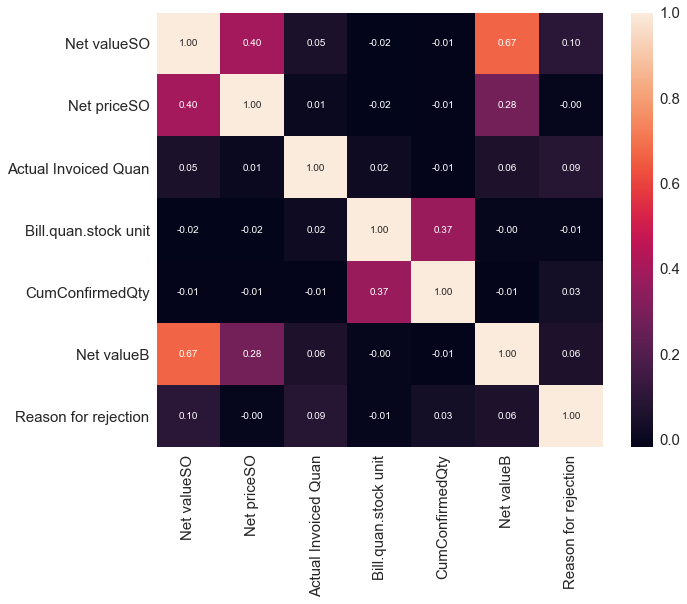

In [45]:
corr_matrix = df[['Created on', 'Net valueSO','Net priceSO','Actual Invoiced Quan', 'Bill.quan.stock unit','CumConfirmedQty','Invoice created','Net valueB','Reason for rejection']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f");

Now let's look at the distribution of all numeric features.Note that we use logarithmic scale everywhere

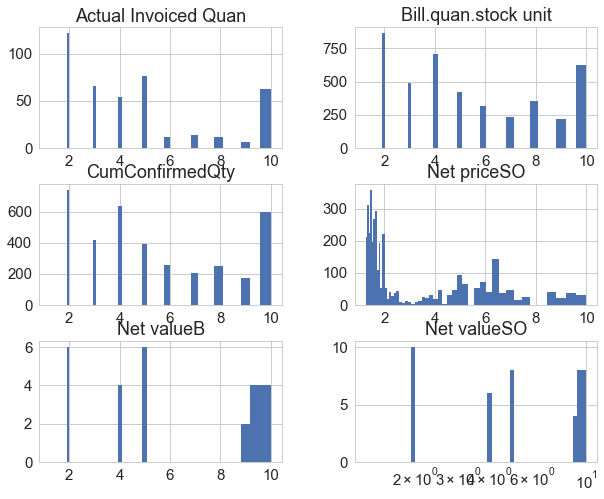

In [46]:
sns.set(style = 'whitegrid', font_scale=1.5)
num_features = list( set(['Net valueSO','Net priceSO','Actual Invoiced Quan', 'Bill.quan.stock unit','CumConfirmedQty','Net valueB']))

df[num_features].hist(bins=np.logspace(0.1, 1.0, 50))
plt.gca().set_xscale("log")
plt.show()


Let's show boxplots, describing key values of disrtibution of numeric features for 2 groups: rejected and non-rejected quotations and sales orders

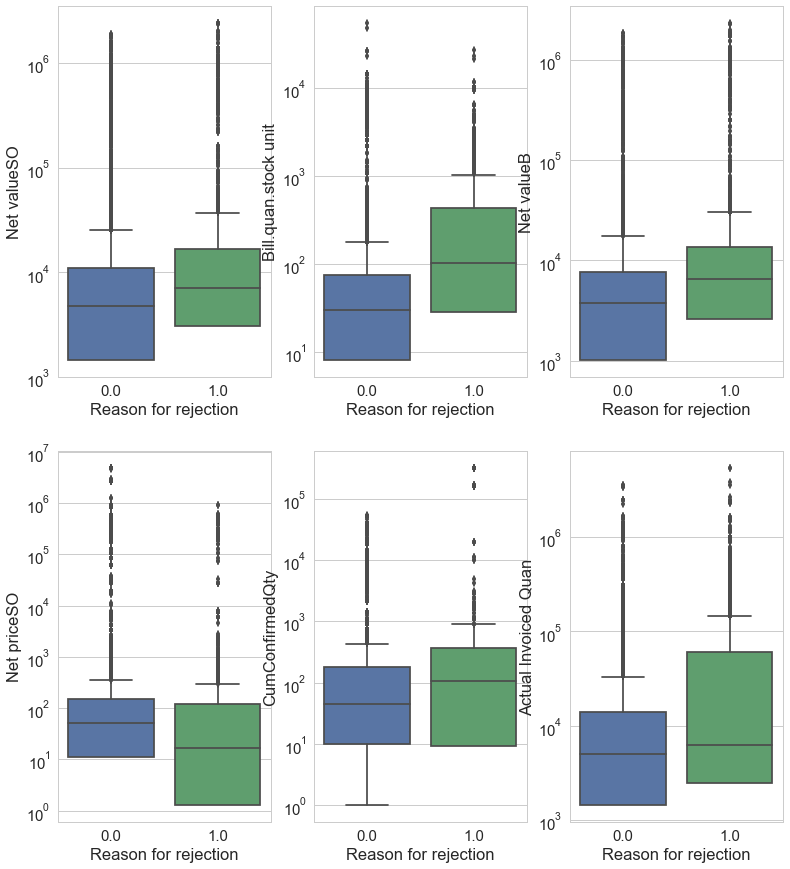

In [47]:
sns.set(style = 'whitegrid', font_scale=1.5)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 15))

for idx, feat in  enumerate(num_features):
    sns.boxplot(x='Reason for rejection', y=feat, data=df, ax=axes[int(idx / 3), idx % 3])
    axes[int(idx / 3), idx % 3].legend()
    axes[int(idx / 3), idx % 3].set_xlabel('Reason for rejection')
    axes[int(idx / 3), idx % 3].set_yscale('log')
    axes[int(idx / 3), idx % 3].set_ylabel(feat);

We can see the maximal difference is for features Net value B and Actual Invoice Quan. Leter on we will determine the importance of features for classifier with RandomForest algorithm or Gradient Boosting. We will see that these feautres are really important for our prediction
From the picture we can notice that in general rejected sales orders and quotations has more inovoiced quatnity then non-rejected ones. Maybe there is a connection between quantity of the order and rejection. 


Finally, let's see how categorical feature Document Currency is related to Reason for rejection. We can print a pivot table or count percentage of reason for rejection for every currency of the Sales order. 

In [48]:
pd.crosstab(df['Document c'], df['Reason for rejection']).T

Document c,DKK,EUR,GBP,JPY,NOK,PLN,USD
Reason for rejection,,,,,,,
0.0,354,15475,188,864,318,1438,72
1.0,16,5652,24,454,2,184,24


In [49]:

df.groupby(['Document c'])['Reason for rejection'].agg([np.mean]).sort_values(by='mean', ascending=False).T

Document c,JPY,EUR,USD,PLN,GBP,DKK,NOK
mean,0.344461,0.267525,0.25,0.11344,0.113208,0.043243,0.00625


We can see that for JPY the percentage of rejected order has the highest value - 13%. For Danish Kronas (DKK) there is the lowest value 0.5%. Maybe this happpens because of data quality we have ( we would need to check the hypotesis about Matthews and Cramers correlation) 
# Data preprocessing
We already done the basic data preprocessing: NaN fitting, deleted redundant features etc. 
Now we will change categorical features with dummy coding and we will scale a numeric features.

So, let's split our data to train, test and validation parts.


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import preprocessing
y = df['Reason for rejection']
df = df.drop(['Reason for rejection'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=777)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=777)

In [51]:

data_scale_train = X_train[num_features]
data_scale_test = X_test[num_features]
scaler = StandardScaler()
data_scaled_train = scaler.fit_transform(data_scale_train)
data_scaled_test = scaler.transform(data_scale_test)

data_dum_train = X_train.drop(X_train[num_features], axis = 1)
data_dum_test = X_test.drop(X_test[num_features], axis = 1)
cat_features = list(data_dum_train.columns.values)

enc = preprocessing.LabelEncoder()
enc_train = data_dum_train.apply(enc.fit_transform)
enc_test = data_dum_test.apply(enc.fit_transform)
 
ohe = OneHotEncoder()
data_ohe_train = ohe.fit_transform(enc_train)
data_ohe_test = ohe.transform(enc_test)

# Choosing metrics
Let's move on to choosing metric of the model.

We have a binary classification tasl . Let's list all the metrics of quality:
* Accuracy
* Recall
* Precision
* F1-score
* Logloss
* Roc auc

First 3 metrics are quite simple and understandable, but they have many pitfalls. Logloss is ofetn used for optimization task .  Choosing f1-score and roc auc for model evaluation is quite good idea because if both metrics are high, it means that the chosen model is not bad and data is consistent. If one of the metrics is high, and the other one is low, it means that we should find mistakes in our model
# Choosing a model
There are several machine learning models for binary classification task:

* KNeighborsClassifier()
* DecisionTreeClassifier()
* LinearSVC()
* LogisticRegression()
* RandomForestClassifier(),
* GradientBoostingClassifier()

We are going to try all of them on basic parameters, then we will chose one and work with it
# Cross validation and hyperparameters tuning

In [52]:
X_train_sparse = hstack([data_scaled_train, data_ohe_train\
                                    ]).tocsr(copy = False) 

X_test_sparse = hstack([data_scaled_test, data_ohe_test\
                             ]).tocsr(copy = False) 

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from time import time

models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state = 777),
    LinearSVC(random_state = 777),
    RandomForestClassifier(n_estimators=100, random_state = 777), 
    GradientBoostingClassifier(n_estimators=100, random_state = 777),
    LogisticRegression(random_state = 777),
]

for model in models:
    start = time()
    model.fit(X_train_sparse, y_train)
    score = np.mean(cross_val_score(model, X_train_sparse, y_train, cv=9, scoring='roc_auc'))
    scoref1 = np.mean(cross_val_score(model, X_train_sparse, y_train, cv=9, scoring='f1'))
    end = time()
    ste = end - start
    print('roc auc:', score, '\n', 'f1:', scoref1, '\n', 'time:', ste, '\n', model)

roc auc: 0.991350606492 
 f1: 0.925446130923 
 time: 58.74842286109924 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
roc auc: 0.982748541024 
 f1: 0.975660748088 
 time: 42.98765325546265 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=777,
            splitter='best')
roc auc: 0.999451725784 
 f1: 0.995185794796 
 time: 22.77844524383545 
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=777, tol=0.0001,
     verbose=0)
roc auc: 0.999054925512 
 f1: 0.980973319544 
 time: 4

From the results above we can see that it is worth to work with DecisionTreeClassifier, LinearSVC, RandomForestClassifier, Logistic Regression because they got best scores on these data

# Creation of new Polynomial features
Let's add new features. In general we have many categorical features and several numeric ones. That's why we will add cross-interaction features. We will make 2nd level features, with no polinomial features and with no bias

In [54]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
data_poly_train = poly.fit_transform(enc_train)
data_poly_test = poly.transform(enc_test)
#make a DF
data_poly_train = pd.DataFrame(data_poly_train)
data_poly_test = pd.DataFrame(data_poly_test)

scaler = StandardScaler()
data_poly_scaled_train = scaler.fit_transform(data_poly_train)
data_poly_scaled_test = scaler.transform(data_poly_test)

In [55]:
X_train_sparse = hstack([data_scaled_train, data_ohe_train,\
                                    data_poly_scaled_train]).tocsr(copy = False) 

X_test_sparse = hstack([data_scaled_test, data_ohe_test,\
                             data_poly_scaled_test]).tocsr(copy = False)

In [56]:
models = [
    DecisionTreeClassifier(random_state = 777),
    LinearSVC(random_state = 777),
    LogisticRegression(random_state = 777)
]

for model in models:
    start = time()
    model.fit(X_train_sparse, y_train)
    score = np.mean(cross_val_score(model, X_train_sparse, y_train, cv=9, scoring='roc_auc'))
    scoref1 = np.mean(cross_val_score(model, X_train_sparse, y_train, cv=9, scoring='f1'))
    end = time()
    ste = end - start
    print('roc auc:', score, '\n', 'f1:', scoref1, '\n', 'time:', ste, '\n', model)

roc auc: 0.996951429172 
 f1: 0.995784920177 
 time: 3068.8382592201233 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=777,
            splitter='best')
roc auc: 0.999500724641 
 f1: 0.995297735275 
 time: 93.97068285942078 
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=777, tol=0.0001,
     verbose=0)
roc auc: 0.999251150406 
 f1: 0.984542734794 
 time: 170.02861499786377 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=777, solver='liblinear', tol

From the results above we can see that the quality becomes slightly better (extremely good), but the time for model training increased drammaticaly. 
The best score and time shows Logistic regression() model. Therefore, we choose this one.

# Hyperparameters tuning

In [57]:
X_train_sparse = hstack([data_scaled_train, data_ohe_train]).tocsr(copy = False)

X_test_sparse = hstack([data_scaled_test, data_ohe_test]).tocsr(copy = False)

In [58]:
for i in ['liblinear', 'sag', 'saga']:
    for j in [100, 1000, 5000, 10000]:
        for k in [0.1, 1]:
                start = time()
                model = LogisticRegression(solver=i, max_iter=j, C=k, random_state=777)
                model.fit(X_train_sparse, y_train)
                score = np.mean(cross_val_score(model, X_train_sparse, y_train, cv=9, scoring='roc_auc'))
                scoref1 = np.mean(cross_val_score(model, X_train_sparse, y_train, cv=9, scoring='f1'))
                end = time()
                ste = end - start
                print('solver:', i, '\n', 'max_iter:', j, '\n', 'C:', k, '\n',\
                      'roc auc:', score, '\n', 'f1:', scoref1, '\n', 'time:', ste)

solver: liblinear 
 max_iter: 100 
 C: 0.1 
 roc auc: 0.99287821303 
 f1: 0.923563366522 
 time: 5.751894950866699
solver: liblinear 
 max_iter: 100 
 C: 1 
 roc auc: 0.999044861751 
 f1: 0.982338711614 
 time: 10.22107219696045
solver: liblinear 
 max_iter: 1000 
 C: 0.1 
 roc auc: 0.99287821303 
 f1: 0.923563366522 
 time: 5.711551904678345
solver: liblinear 
 max_iter: 1000 
 C: 1 
 roc auc: 0.999044861751 
 f1: 0.982338711614 
 time: 9.693125009536743
solver: liblinear 
 max_iter: 5000 
 C: 0.1 
 roc auc: 0.99287821303 
 f1: 0.923563366522 
 time: 5.396313905715942
solver: liblinear 
 max_iter: 5000 
 C: 1 
 roc auc: 0.999044861751 
 f1: 0.982338711614 
 time: 9.991711854934692
solver: liblinear 
 max_iter: 10000 
 C: 0.1 
 roc auc: 0.99287821303 
 f1: 0.923563366522 
 time: 5.462318181991577
solver: liblinear 
 max_iter: 10000 
 C: 1 
 roc auc: 0.999044861751 
 f1: 0.982338711614 
 time: 9.720062017440796
solver: sag 
 max_iter: 100 
 C: 0.1 
 roc auc: 0.992833882074 
 f1: 0.92333

From the results above we can conclude that the best parameters for Logistic Regression are:
 solver: liblinear,max_iter: 1000, C: 0.1. Then, we will use these parameters in our model. 

# Validation on test data 

In [66]:
data_scale_train = X_train[num_features]
data_scale_test = X_test[num_features]
scaler = StandardScaler()
data_scaled_train = scaler.fit_transform(data_scale_train)
data_scaled_test = scaler.transform(data_scale_test)

data_dum_train = X_train.drop(X_train[num_features], axis = 1)
data_dum_test = X_test.drop(X_test[num_features], axis = 1)

enc = preprocessing.LabelEncoder()
enc_train = data_dum_train.apply(enc.fit_transform)
enc_test = data_dum_test.apply(enc.fit_transform)
 
ohe = OneHotEncoder(categorical_features='all',sparse=True)
data_ohe_train = ohe.fit_transform(enc_train)
data_ohe_test = ohe.transform(enc_test)

X_train_sparse = hstack([data_scaled_train, data_ohe_train\
                                    ]).tocsr(copy = False) 

X_test_sparse = hstack([data_scaled_test, data_ohe_test\
                             ]).tocsr(copy = False) 

In [67]:
from sklearn.metrics import f1_score, roc_auc_score

for i in ['liblinear']:
    for j in [1000]:
        for k in [0.1]:
                start = time()
                model = LogisticRegression(solver=i, max_iter=j, C=k, random_state=777)
                model.fit(X_train_sparse, y_train)
                preds = model.predict(X_test_sparse)
                score = roc_auc_score(y_test, preds)
                scoref1 = f1_score(y_test, preds)
                end = time()
                ste = end - start
                print('solver:', i, '\n', 'max_iter:', j, '\n', 'C:', k, '\n',\
                      'roc auc:', score, '\n', 'f1:', scoref1, '\n', 'time:', ste)

solver: liblinear 
 max_iter: 1000 
 C: 0.1 
 roc auc: 0.75846135463 
 f1: 0.614672835426 
 time: 0.5501523017883301


# Prediction for validation dataset

In [68]:
X_train = X_train.append(X_test).reset_index().drop('index', axis=1)
y_train = y_train.append(y_test)

data_scale_train = X_train[num_features]
data_scale_test = X_valid[num_features]
scaler = StandardScaler()
data_scaled_train = scaler.fit_transform(data_scale_train)
data_scaled_test = scaler.transform(data_scale_test)

data_dum_train = X_train.drop(X_train[num_features], axis = 1)
data_dum_test = X_valid.drop(X_test[num_features], axis = 1)

enc = preprocessing.LabelEncoder()
enc_train = data_dum_train.apply(enc.fit_transform)
enc_test = data_dum_test.apply(enc.fit_transform)
 
ohe = OneHotEncoder(categorical_features='all',sparse=True)
data_ohe_train = ohe.fit_transform(enc_train)
data_ohe_test = ohe.transform(enc_test)

X_train_sparse = hstack([data_scaled_train, data_ohe_train\
                                    ]).tocsr(copy = False) 

X_test_sparse = hstack([data_scaled_test, data_ohe_test\
                             ]).tocsr(copy = False) 

In [69]:
from sklearn.metrics import f1_score, roc_auc_score

for i in ['liblinear']:
    for j in [1000]:
        for k in [0.1]:
                start = time()
                model = LogisticRegression(solver=i, max_iter=j, C=k, random_state=777)
                model.fit(X_train_sparse, y_train)
                preds = model.predict(X_test_sparse)
                score = roc_auc_score(y_valid, preds)
                scoref1 = f1_score(y_valid, preds)
                end = time()
                ste = end - start
                print('solver:', i, '\n', 'max_iter:', j, '\n', 'C:', k, '\n',\
                      'roc auc:', score, '\n', 'f1:', scoref1, '\n', 'time:', ste)

solver: liblinear 
 max_iter: 1000 
 C: 0.1 
 roc auc: 0.746352691188 
 f1: 0.57748776509 
 time: 0.659163236618042


# Summary

* From the very beginning of our prediction process, where we trained many models we received 'fantasticly good ' results for every model, no matter linear or tree model ( roc_auc, f1_score =0.99). 
* If we look at our correlation matrix for target feature, we can see that our target doesn't correlate so much with any categorical feature in the dataset 
* For logistic regression we can see that the results on validation set are significantly lower: roc_auc =  0.74, f1_score =

To sum up, we can conclude that we faced 'signal - noize' error for our dataset, a situation when predictive model recognize noize data as a signal. Therefore, machine learning learning algorithms cannot be used for this dataset